In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [6]:
iris = sns.load_dataset('iris')
titanic = sns.load_dataset('titanic')
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')

# Module Configuration

### Plot Encoding

In [4]:
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family='binggrae')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/binggrae.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system!!')

In [7]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [19]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

### pariplot
- https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot
- 카테고리형 데이터가 섞여 있는 경우 hue 인수에 카테고리 이름을 지정한다.
- 품종에 따라 색상을 다르게 하여 한꺼번에 비교, 분석이 용이하다

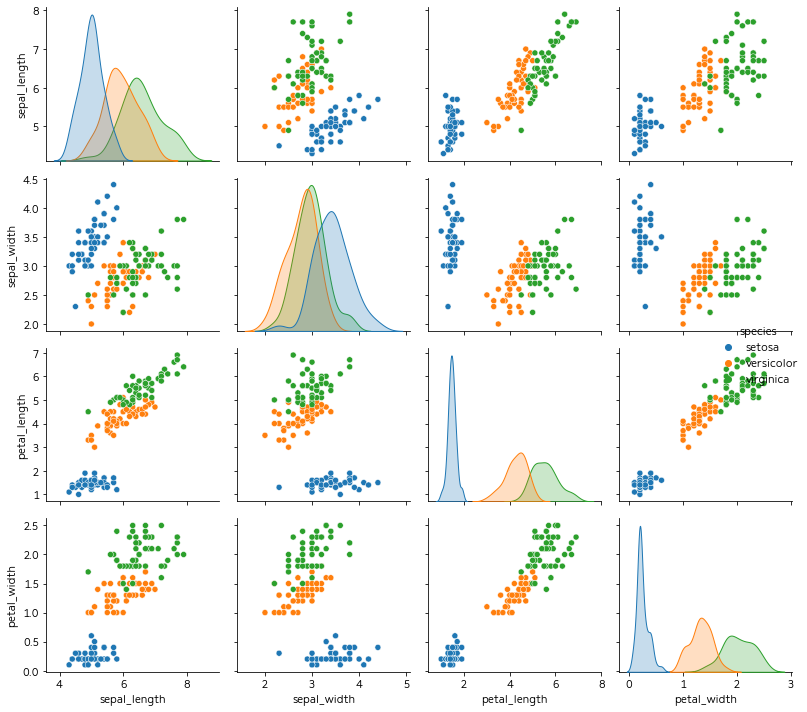

In [22]:
sns.pairplot(iris, hue='species')
plt.tight_layout()

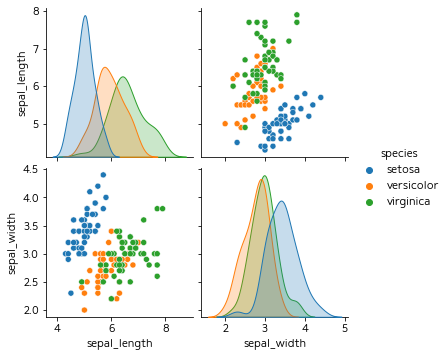

In [24]:
# 일부만 보고 싶다면?
sns.pairplot(iris, hue='species', vars=['sepal_length', 'sepal_width'])

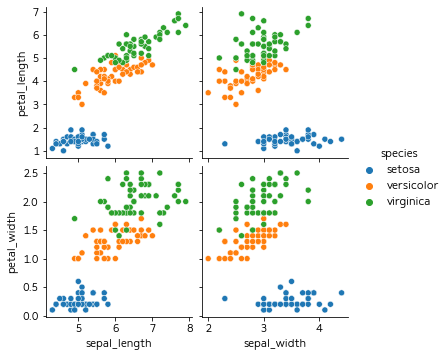

In [25]:
# x, y를 따로따로 지정
sns.pairplot(iris, hue='species', x_vars=['sepal_length', 'sepal_width'], y_vars=['petal_length', 'petal_width'])

# countplot
- http://seaborn.pydata.org/generated/seaborn.countplot.html
- 가장 많이 사용되는 시각화 tool 중 하나
- 각 컬럼별 데이터가 몇개 있는지를 확인 할 수 있다.
- 해당 함수는 DataFrame만 적용가능함
- y축은 default로 x축에 해당하는 데이터의 개수를 나타낸다.
- 하지만, 분석하려는 x에 실수값이나 또 다른 정수값이 들어간다면 y에 해당 컬럼을 지정하고 barPlot을 사용하길 추천

In [28]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [32]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


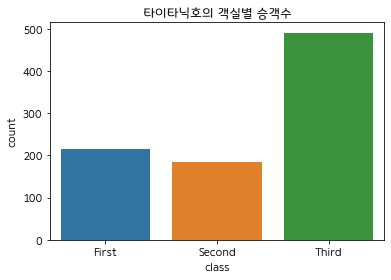

In [40]:
# 객실별 승객수
sns.countplot(x='class', data=titanic)
plt.title('타이타닉호의 객실별 승객수')
plt.show()

<AxesSubplot:xlabel='class', ylabel='count'>

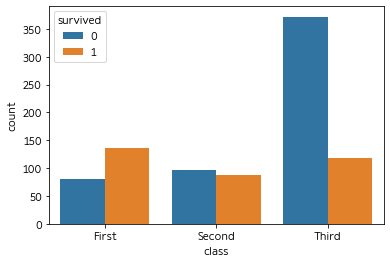

In [51]:
sns.countplot(x='class', data=titanic, hue='survived')

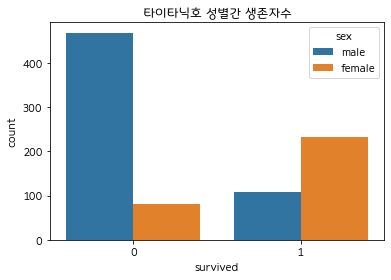

In [39]:
sns.countplot(x='survived', data=titanic, hue='sex')
plt.title('타이타닉호 성별간 생존자수')
plt.show()

# barplot
- countplot과는 다르게 y축 설정이 필요한 경우 숫자 데이터로 y축을 지정해 사용한다
- 결과적으로 타이타닉호 동석에 따른 운임요금은 승객의 생존여부와 밀접한 관련이 있음을 알 수 있다.
- http://seaborn.pydata.org/generated/seaborn.barplot.html

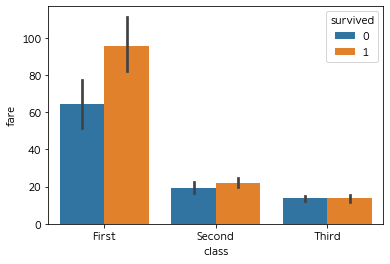

In [45]:
sns.barplot(x='class', y='fare', data=titanic, hue='survived')
plt.show()

In [56]:
titanic.pivot_table(index=['survived', 'class'])[['fare']]

fare
survived class            
0        First   64.684008
         Second  19.412328
         Third   13.669364
1        First   95.608029
         Second  22.055700
         Third   13.694887

<AxesSubplot:>

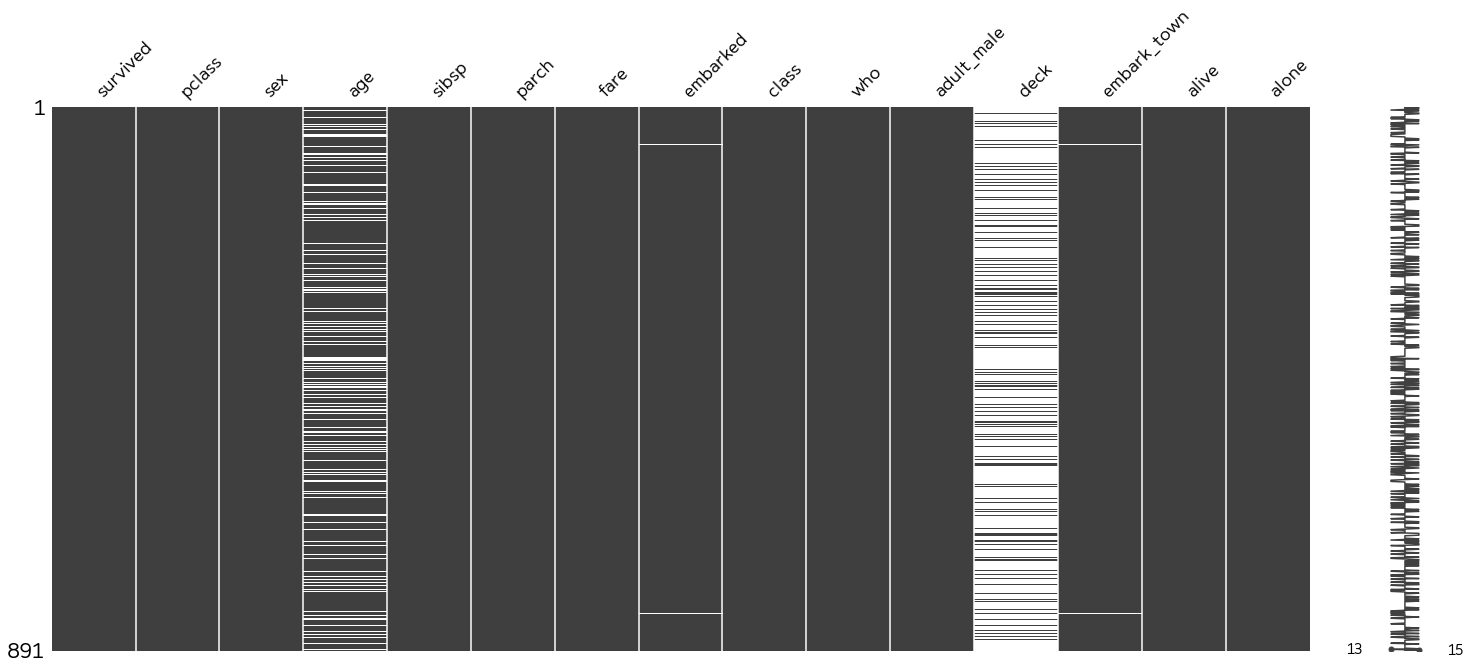

In [64]:
import missingno as msno
msno.matrix(titanic)

In [70]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<AxesSubplot:xlabel='fare', ylabel='Density'>

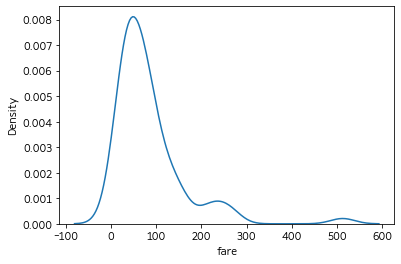

In [68]:
sns.kdeplot(titanic[titanic['pclass'] == 1]['fare'])

In [82]:
df = titanic.pivot_table(index=['fare', 'class'])
df[df['pclass']== 1]#.index#['pclass']

,,adult_male,age,alone,parch,pclass,sibsp,survived
fare,class,,,,,,,
0.0000,First,1.000000,39.000000,1.000000,0.000000,1,0.00,0.00
5.0000,First,1.000000,33.000000,1.000000,0.000000,1,0.00,0.00
25.5875,First,1.000000,47.000000,1.000000,0.000000,1,0.00,0.00
25.9250,First,1.000000,NaN,1.000000,0.000000,1,0.00,0.00
25.9292,First,0.000000,48.500000,1.000000,0.000000,1,0.00,1.00
...,...,...,...,...,...,...,...,...
227.5250,First,0.250000,32.666667,0.750000,0.000000,1,0.25,0.75
247.5208,First,0.500000,37.000000,0.000000,1.000000,1,0.00,0.50
262.3750,First,0.000000,19.500000,0.000000,2.000000,1,2.00,1.00


In [74]:
titanic[titanic['fare']>0]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [63]:
titanic.pivot_table(index=['class', 'survived'])[['fare']]

fare
class  survived           
First  0         64.684008
       1         95.608029
Second 0         19.412328
       1         22.055700
Third  0         13.669364
       1         13.694887

# pointplot

<AxesSubplot:xlabel='class', ylabel='fare'>

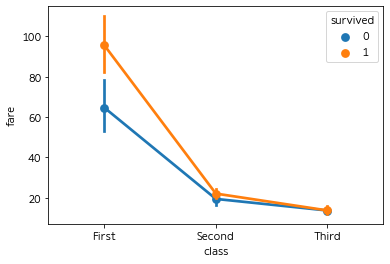

In [46]:
sns.pointplot(x='class', y='fare', data=titanic, hue='survived')

<AxesSubplot:xlabel='class', ylabel='survived'>

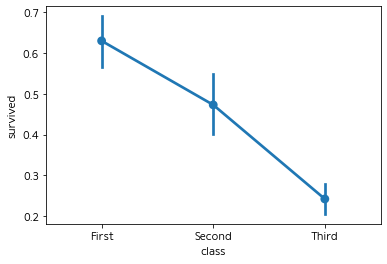

In [49]:
sns.pointplot(x='class', y='survived', data=titanic)

In [50]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## matplotlib encoding

In [ ]:
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system!!')